In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel("merc.xlsx") # veriyi okutalım

In [3]:
df # veriyi gösterdim

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


Veri setimiz 7 sütundan 13.119 satırdan oluşuyormuş ve anladığımız kadarıyla bu veri setindeki özellikler:
* yıl -> arabanın model yılını
* price -> arabanın dolar sterlin bazlı fiyatını
* transmission -> arabanın vites türünü
* mileage -> arabanın km'sı veya mili 
* tax -> vergisini
* mpg -> yakıt tüketimini 
* engineSize -> motor hacmini
ifade ediyormuş.

Şimdi biz sayısal analizler yapacağımız için burada transmission'a hiç gerek yok kaldı ki bunlar analize de dahil olmayacaktır. O yüzden analize bakmadan önce bu sütunu bi veri setinden düşürelim

In [4]:
df.drop(columns=["transmission"], inplace=True) 

In [5]:
df # yeni veri seti

,year,price,mileage,tax,mpg,engineSize
0,2005,5200,63000,325,32.1,1.8
1,2017,34948,27000,20,61.4,2.1
2,2016,49948,6200,555,28.0,5.5
3,2016,61948,16000,325,30.4,4.0
4,2016,73948,4000,325,30.1,4.0
...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0
13115,2020,24699,2500,145,55.4,2.0
13116,2019,30999,11612,145,41.5,2.1
13117,2019,37990,2426,145,45.6,2.0


### Data visualization

In [6]:
df.describe() # veri setinin istatistiksel özellikleri

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [7]:
df.isnull().sum() # eksik veri var mı 

year          0
price         0
mileage       0
tax           0
mpg           0
engineSize    0
dtype: int64

F:\Anaconda Navigator\navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

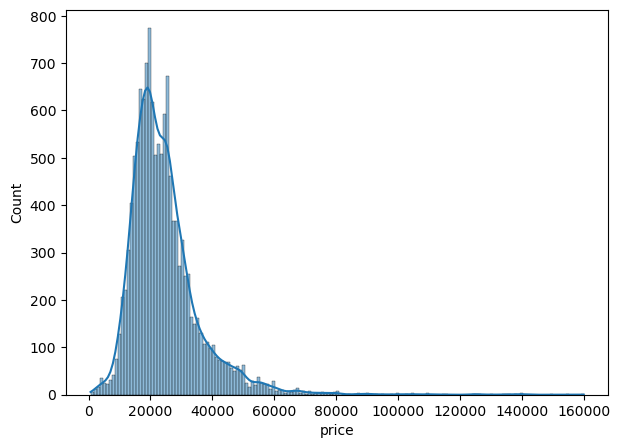

In [8]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df["price"], kde=True)

<Axes: xlabel='year', ylabel='count'>

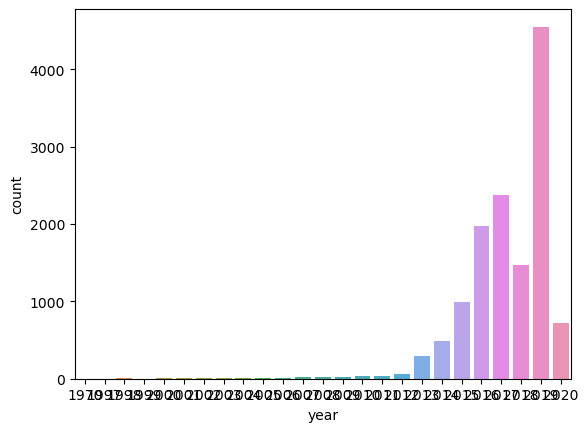

In [9]:
sns.countplot(df, x="year")

In [10]:
df.corr() # korelasyon

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [11]:
df.corr()["price"].sort_values() # fiyata göre en iyi korelasyon sıralaması

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='mileage', ylabel='price'>

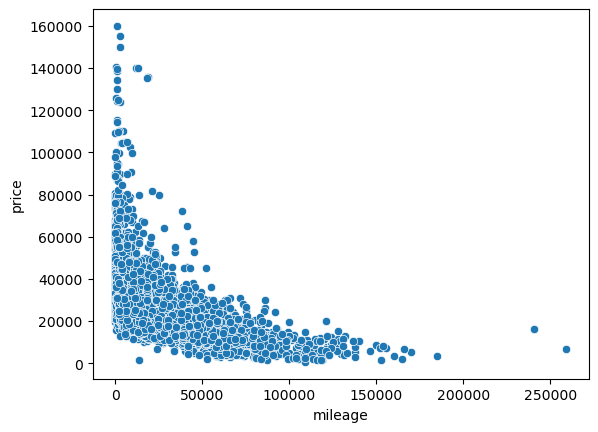

In [12]:
sns.scatterplot(data = df, x = "mileage", y = "price") # datanın kendisi, neyle kıyaslanacak, hedef değişken

> En yüksek fiyata sahip arabalar nelerdir ?

In [13]:
df.sort_values("price", ascending = False).head(20) #price sütunu, ascending: false, büyükten küçüğe - true: küçükten büyüğe, ilk 20 veriyi listele

,year,price,mileage,tax,mpg,engineSize
6199,2020,159999,1350,145,21.4,4.0
10044,2020,154998,3000,150,21.4,4.0
5,2011,149948,3000,570,21.4,6.2
8737,2019,140319,785,150,22.1,4.0
6386,2018,139995,13046,145,21.4,4.0
8,2019,139948,12000,145,21.4,4.0
9133,2019,139559,1000,145,22.1,4.0
8821,2020,138439,1000,145,22.1,4.0
5902,2018,135771,19000,145,21.4,4.0
7864,2018,135124,18234,150,21.4,4.0


* Veri Biliminde bir analiz için veri setinin tamamıyla çalışmak zorunda değiliz. %99'luk bir veriyle çalışmak da bizim için sorun olmayacaktır. Bu veri setinde yüksek fiyatlı arabalar model sağlığını etkileyebilecek potansiyelde verilerdir.
* Buna uygun olarak bu veri setinin %1'lik bir verisi bakalım kaç adetmiş ?

In [14]:
len(df) * 0.01

131.19

Bizim veri setimizde %1'lik bir dilime tekamül eden veri sayısı 131'miş. Buna uygun olarak 131 tane veri çıkartılması hem verinin yapısını da bozmayacaktır hem de kurulacak olan modelin de sağlığını etkilemeyecektir.
* Buna göre bu veri setinden biz yüksek fiyatlı 131 adet veriyi çıkartırsak veri yapısını bozmadan sağlıklı bir model kurmuş olacağız...

In [15]:
new_df = df.sort_values("price", ascending = False).iloc[131:]

In [16]:
new_df.describe().T # .T hali tablo şeklinde verir

,count,mean,std,min,25%,50%,75%,max
year,12988.0,2017.281876,2.228515,1970.0,2016.000,2018.0,2019.00,2020.0
price,12988.0,24074.926933,9866.224575,650.0,17357.500,22299.0,28706.00,65990.0
mileage,12988.0,22132.741146,21196.776401,1.0,6322.000,15369.5,31982.25,259000.0
tax,12988.0,129.689714,65.183076,0.0,125.000,145.0,145.00,580.0
mpg,12988.0,55.437142,15.025999,1.1,45.600,56.5,64.20,217.3
engineSize,12988.0,2.050901,0.532596,0.0,1.675,2.0,2.10,6.2


F:\Anaconda Navigator\navigator\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x1000 with 0 Axes>

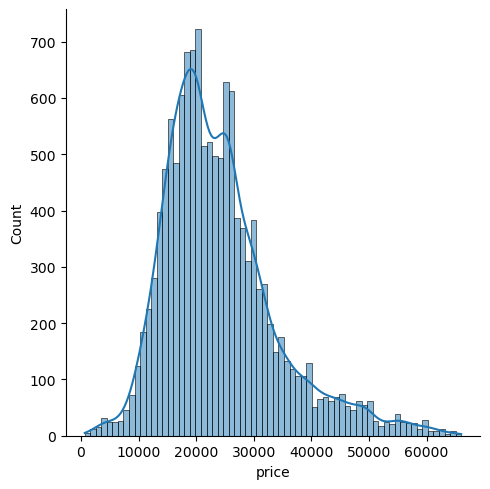

In [17]:
plt.figure(figsize=(8,10))

sns.displot(new_df["price"], kde=True) #dağılım grafiğini bir görelim

In [18]:
# yeni dataframe'de yıllara göre ortalama fiyatlar
new_df.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [19]:
# eski datframe'e göre yıllara göre ortalama fiyatlar 
df.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

* Eski dataframe'i incelediğimizde 1970 model bir arabanın fiyat ortalaması 25 bin poundmuş ha keza 2018 model bir arabanın da ortalaması 25 bin poundmuş.
* Bu ortalamalar göz önüne alındığında 1970 model bir arabanın 25 bin pound olması bu arabanın bir klasik araba olması durumunu göz önünde tutabiliriz. Bu klasik arabaların gerçek hayatta karşılaşma olasılığımız ise oldukça düşüktür. Daha çok yeni model arabalarla karşılaşırız. Bu durum göz önüne aldığımızda 1970 model arabaların datasette olmasının bir anlamı da yoktur. 
* Ama bu bir karardır İstersen veri setinden çıkartırsın istersen çıkartmazsın sana kalmış ama biz burada nasıl çıkaracağımızı da anlatalım. Aşağıdaki kod bu 1970 model pahalı klasik arabaları veri setinden ayıklayacaktır. Bunu bir değişkene atayarak model de kurabiliriz.

In [20]:
df[df.year != 1970].groupby("year").mean()["price"] # 1970 yıl modelinde olanları veri setinden çıkarttı ama bir değişkene atamadık halen

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [21]:
df = new_df # eski veriyle yeni veriyi eşitledim

In [22]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [23]:
df = df[df.year != 1970]

In [24]:
df.groupby("year").mean()["price"] # son olarak yıllara göre fiyat dağılımını gördüm.

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [25]:
df.describe() # verinin son halinin istatiksel metrikleri

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [26]:
y = df["price"].values # y hedef değişkenini seçtik ve numpy dizisine dönüştürdük
x = df.drop("price", axis = 1).values # x özellik değişkeninden hedef değişkeni çıkartıp numpy dizisine dönüştürdüm

In [27]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [28]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

#### Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)

In [31]:
print("X eğitim verisindeki veri noktası sayısı: ", len(x_train))
print("X test verisindeki veri noktası sayısı: ", len(x_test))

X eğitim verisindeki veri noktası sayısı:  9090
X test verisindeki veri noktası sayısı:  3897


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler() # verileri scale edeceğiz...

In [34]:
x_train = scaler.fit_transform(x_train)

In [35]:
x_test = scaler.transform(x_test)

#### Tensorflow Model Kurulumu

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
x_train.shape # 5 features varsa normalde 5 koyabiliriz ama burada iyi bir sonuç alamadığımız için bu sayıyı 12'ye kadara arttırabiliriz.

(9090, 5)

In [62]:
model = Sequential()

model.add(Dense(12, activation="relu")) # 12 adet nöron activation ise relu
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

model.add(Dense(1)) # çıkış katmanı

model.compile(optimizer="adam", loss="mse") # optimizer seçimi

* Modelimiz hazır artık eğitme işlemine geçebiliriz ancak bilmemiz gereken bişeyler var

* validation_data() doğrulama datası anlamına gelir bisiklet fiyatlarında yaptığınız manuel doğrulama işlemini burada otomatikleştirmek için yaparız.
* batch_size  modele kaçar kaçar veri vereceğimizi söylemektedir. Düşük tutulursa modelin eğitim süresi uzar ama model yorulmamış olur.
* epochs kaç geçişte duracağını söyler batch_size, epochs kadar önemli değildir. epochs'u fazla fazla arttırırsak modelde overfittinge sebep olabilirsin ve model eğitim süresini de oldukça fazla uzatabilirsin o yüzden epochs oldukça önemlidir.

In [63]:
model.fit(x = x_train, y = y_train, validation_data=(x_test,y_test), batch_size=250, epochs=320)

Epoch 1/320
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 669875712.0000 - val_loss: 688364352.0000
Epoch 2/320
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 668682624.0000 - val_loss: 687945216.0000
Epoch 3/320
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 673748672.0000 - val_loss: 683423808.0000
Epoch 4/320
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 662209984.0000 - val_loss: 643235072.0000
Epoch 5/320
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 595919424.0000 - val_loss: 389327520.0000
Epoch 6/320
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 267276160.0000 - val_loss: 96623992.0000
Epoch 7/320
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91780896.0000 - val_loss: 90899360.0000
Epoch 8/320
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88620648.0000 - val_loss: 89065184.0000
Epoch 9/320
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85241056.0000 - val_loss: 87452872.0000
Epoch 10/320
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86124736.0000 - val_loss: 86086320.000

* modelin eğitim sürecini görselleştirmek isteyelim

In [64]:
kayip_veri = pd.DataFrame(model.history.history) # grafiğe dökmek için öncelikle dataframe'a dönüştürdük

In [65]:
kayip_veri # artık manuel olarak val_loss'u bulmak zorunda değiliz çünkü modeli eğitirken otomatikleştirdiğimiz için burada gözüküyor.

,loss,val_loss
0,672654848.0,688364352.0
1,670919488.0,687945216.0
2,668474368.0,683423808.0
3,654216256.0,643235072.0
4,537441536.0,389327520.0
...,...,...
315,16026006.0,17337408.0
316,16225038.0,17323506.0
317,16110035.0,17341676.0
318,16024313.0,17294526.0


<Axes: >

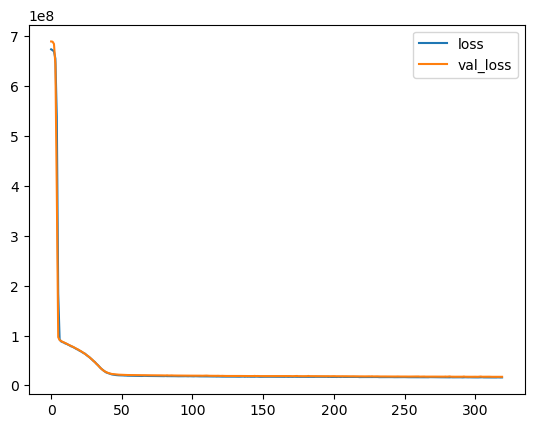

In [66]:
kayip_veri.plot()

> Bu grafik oldukça sağlıklı bir eğitim olduğunu gösterir peki bu anlamı nasıl çıkardık ?
* 1: Modeldeki eğriler aşağı yönlü hareket ediyor mu ve sonlara doğru sıfıra yaklaşıyor mu ? Yukarıdaki grafiğe baktığımız zaman bunların hepsini görebiliyoruz o zaman iyi bir modelleme yapmışızdır.
* 2: loss ile val_loss çizgileri birbirlerine paralel olarak veya birlikte hareket ediyor mu (özellikle de sonlara doğru) ? Eğer gidiyorsa problem yoktur ama gitmiyorsa örneğin val_loss ile loss arasında bir farklılık olarak ayrılma gerçekleşiyorsa bu overfitting yani aşırı öğrenme belirtisidir. Bu durumu yaşarsak eğer direkt olarak modeli fit ettiğimiz kısma gidip epochs değerini düşürmemiz gerekir.

In [67]:
# metrics değerleriyle modelimizin doğruluğunu bi kontrol edelim
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
tahminDizisi = model.predict(x_test)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [69]:
tahminDizisi

array([[18743.773],
       [22290.193],
       [24286.062],
       ...,
       [26952.543],
       [12426.843],
       [23887.283]], dtype=float32)

In [72]:
mean_absolute_error(y_test, tahminDizisi) # sapma %8

2968.5812938789054

In [71]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


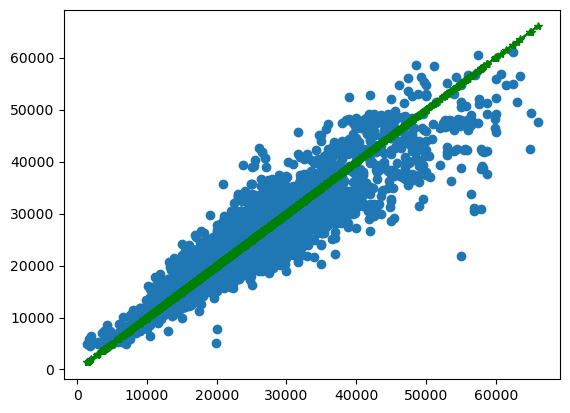

In [74]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, "g*-")

* Sapmayı bir örneklemek istiyorum

In [77]:
df.iloc[2] # ikinci datayı görüntüledim

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [78]:
yeniArabaSeries = df.drop("price", axis=1).iloc[2] # 2. satırdaki veriyi düşürecektir ve yeni bir değişkene atayacaktır.

In [79]:
type(yeniArabaSeries)

pandas.core.series.Series

In [80]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [82]:
model.predict(yeniArabaSeries)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[59655.17]], dtype=float32)